In [4]:
# import libiaries
%matplotlib inline
import warnings
import numpy as np
import pandas as pd
import pandas_datareader.data as web 
import datetime as dt 
from numpy import random
from scipy import stats
import matplotlib.pyplot as plt
# import seaborn as sns
# import quandl
# from IPython.display import Image
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
# import patsy
# from statsmodels.graphics.api import abline_plot
# import numpy.linalg as linalg
# import pymc3 as pm
# from mpl_toolkits.mplot3d import Axes3D
# warnings.simplefilter('ignore')
# sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)

In [6]:
# !pip install pandas_datareader

In [9]:
import os
print(os.getcwd())
 
os.chdir('.')
print(os.listdir("."))
# help(os)

/Users/samirachaunkaria/Desktop/FIN 359 Coursework
['if-else statement.ipynb', 'Launcher.ipynb', 'Untitled1.ipynb', 'Intro to Pandas - In class demo (Oct 29).ipynb', 'Untitled.ipynb', 'NPV exercise.ipynb', 'Untitled2.ipynb', 'What are variables?.ipynb', 'Practice Problem Set - Functions and IF statements (Questions).ipynb', 'untitled.txt', 'HW3_Instruction-1.ipynb', '.ipynb_checkpoints', 'Exercise_Functions (Questions).ipynb', 'Exercise_Functions (Solutions).ipynb', 'Pandas Package.ipynb']


# Define the time span

In [14]:
start_date = dt.datetime(1990, 1, 1)
end_date = dt.datetime(2024, 8, 1)

# Pull data from FRED

In [18]:
# Pull data for Los Angeles housing price index
la_housing_index = web.DataReader('LXXRSA', 'fred', start_date, end_date)

In [20]:
# Pull data for U.S. national housing price index
us_housing_index = web.DataReader('CSUSHPISA', 'fred', start_date, end_date)

In [31]:
# Show the values of the first five observations of LXXRSA
print("Los Angeles Housing Price Index:")
print(la_housing_index.head())

Los Angeles Housing Price Index:
                LXXRSA
DATE                  
1990-01-01  100.471193
1990-02-01  100.761572
1990-03-01  100.992838
1990-04-01  100.990410
1990-05-01  100.394583


In [33]:
# Show the values of the first five observations of CSUSHPISA
print("\nU.S. National Housing Price Index:")
print(us_housing_index.head())


U.S. National Housing Price Index:
            CSUSHPISA
DATE                 
1990-01-01     76.897
1990-02-01     77.053
1990-03-01     77.201
1990-04-01     77.278
1990-05-01     77.297


# Describe the data

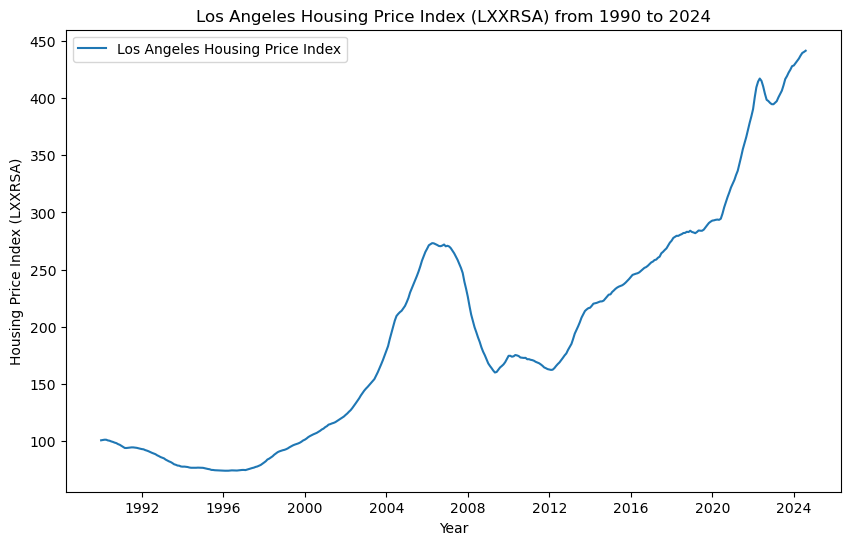

In [47]:
# Generate a time-series plot of LXXRSA over (1990/01/01, 2024/08/01)
plt.figure(figsize=(10, 6))  # Set figure size for better readability
plt.plot(la_housing_index, label="Los Angeles Housing Price Index")

# Labeling the axes
plt.xlabel("Year")          # X-axis label for time
plt.ylabel("Housing Price Index (LXXRSA)")  # Y-axis label for the housing price index

# Adding a title
plt.title("Los Angeles Housing Price Index (LXXRSA) from 1990 to 2024")

# Adding a legend
plt.legend()

# Display the plot
plt.show()

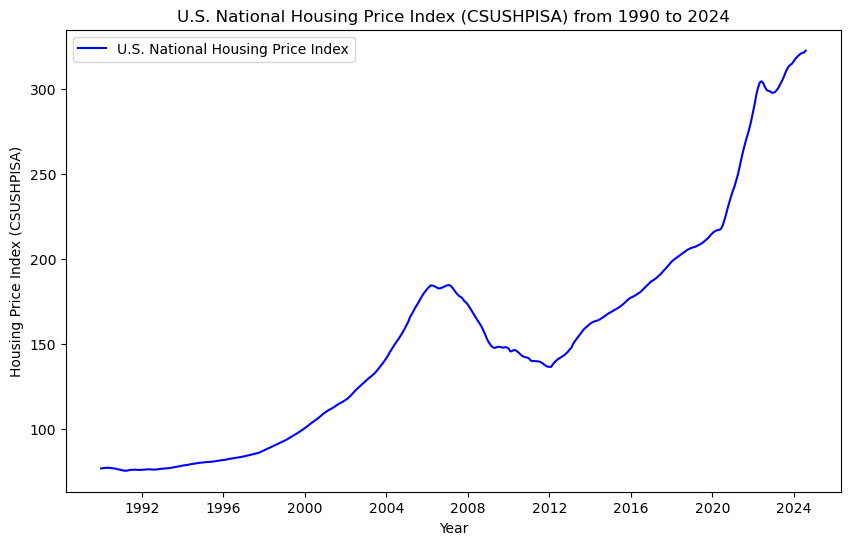

In [49]:
# Generate a time-series plot of CSUSHPISA over (1990/01/01, 2024/08/01)
plt.figure(figsize=(10, 6))  # Set figure size for readability
plt.plot(us_housing_index, label="U.S. National Housing Price Index", color='blue')

# Labeling the axes
plt.xlabel("Year")  # X-axis label for time
plt.ylabel("Housing Price Index (CSUSHPISA)")  # Y-axis label for the housing price index

# Adding a title
plt.title("U.S. National Housing Price Index (CSUSHPISA) from 1990 to 2024")

# Adding a legend
plt.legend()

# Display the plot
plt.show()

In [90]:
# Create a dataframe (pandas) - containing two housing price series (LXXRSA and CSUSHPISA)
import pandas as pd
import pandas_datareader.data as web
import datetime as dt

In [92]:
# Define the time span
start_date = dt.datetime(1990, 1, 1)
end_date = dt.datetime(2024, 8, 1)

In [94]:
# Pull data from FRED
la_housing_index = web.DataReader('LXXRSA', 'fred', start_date, end_date)
us_housing_index = web.DataReader('CSUSHPISA', 'fred', start_date, end_date)

In [96]:
# Merge the two DataFrames on their index (date)
housing_data = pd.merge(la_housing_index, us_housing_index, left_index=True, right_index=True)
housing_data.columns = ['LXXRSA', 'CSUSHPISA']  # Rename columns for clarity

In [98]:
# Display the shape of the DataFrame
print("DataFrame dimensions (rows, columns):", housing_data.shape)

DataFrame dimensions (rows, columns): (416, 2)


In [100]:
# Calculate the correlation between LXXRSA and CSUSHPISA
correlation = housing_data['LXXRSA'].corr(housing_data['CSUSHPISA'])
print("Correlation between LXXRSA and CSUSHPISA:", correlation)

Correlation between LXXRSA and CSUSHPISA: 0.9900889633815761


In [111]:
# Generate a time-series plot of CSUSHPISA and LXXRSA over (1990/01/01, 2024/08/01)

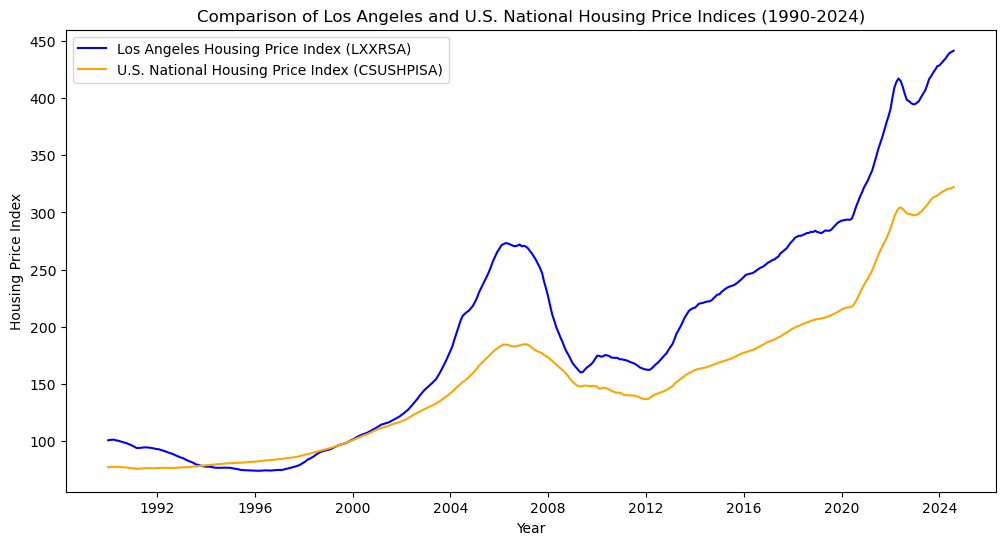

In [113]:
# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Plot LXXRSA (Los Angeles Housing Price Index)
plt.plot(housing_data.index, housing_data['LXXRSA'], label="Los Angeles Housing Price Index (LXXRSA)", color='blue')

# Plot CSUSHPISA (U.S. National Housing Price Index)
plt.plot(housing_data.index, housing_data['CSUSHPISA'], label="U.S. National Housing Price Index (CSUSHPISA)", color='orange')

# Label the X and Y axes
plt.xlabel("Year")  # X-axis label for the time
plt.ylabel("Housing Price Index")  # Y-axis label for housing price index values

# Add a title
plt.title("Comparison of Los Angeles and U.S. National Housing Price Indices (1990-2024)")

# Add a legend to differentiate the lines
plt.legend()

# Display the plot
plt.show()


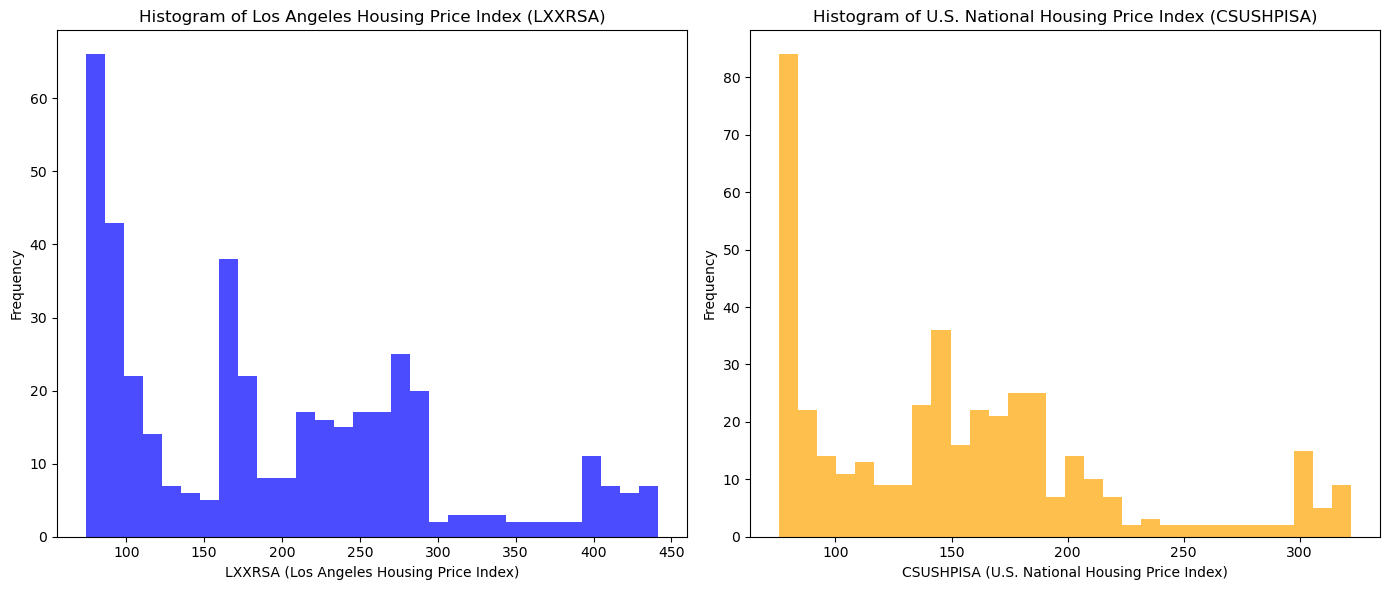

In [116]:
# Generate a Histogram of CSUSHPISA and LXXRSA

# Set up the figure size for better readability
plt.figure(figsize=(14, 6))

# Histogram for LXXRSA
plt.subplot(1, 2, 1)  # Create a 1x2 grid and use the 1st subplot
plt.hist(housing_data['LXXRSA'].dropna(), bins=30, color='blue', alpha=0.7)
plt.xlabel("LXXRSA (Los Angeles Housing Price Index)")
plt.ylabel("Frequency")
plt.title("Histogram of Los Angeles Housing Price Index (LXXRSA)")

# Histogram for CSUSHPISA
plt.subplot(1, 2, 2)  # Use the 2nd subplot
plt.hist(housing_data['CSUSHPISA'].dropna(), bins=30, color='orange', alpha=0.7)
plt.xlabel("CSUSHPISA (U.S. National Housing Price Index)")
plt.ylabel("Frequency")
plt.title("Histogram of U.S. National Housing Price Index (CSUSHPISA)")

# Display the histograms
plt.tight_layout()
plt.show()

In [ ]:
# What is mean, standard deviation, and max value of LXXRSA?

In [125]:
# Define the time span
start_date = dt.datetime(1990, 1, 1)
end_date = dt.datetime(2024, 8, 1)

In [127]:
# Pull data from FRED for both indices
la_housing_index = web.DataReader('LXXRSA', 'fred', start_date, end_date)
us_housing_index = web.DataReader('CSUSHPISA', 'fred', start_date, end_date)

In [128]:
# Merge the data on the index (date)
housing_data = pd.merge(la_housing_index, us_housing_index, left_index=True, right_index=True)
housing_data.columns = ['LXXRSA', 'CSUSHPISA']

In [131]:
# Calculate mean, standard deviation, and maximum for LXXRSA
lxxrsa_mean = housing_data['LXXRSA'].mean()
lxxrsa_std = housing_data['LXXRSA'].std()
lxxrsa_max = housing_data['LXXRSA'].max()

In [133]:
# Print the results
print("Mean of LXXRSA:", lxxrsa_mean)
print("Standard Deviation of LXXRSA:", lxxrsa_std)
print("Maximum Value of LXXRSA:", lxxrsa_max)

Mean of LXXRSA: 193.3337559205581
Standard Deviation of LXXRSA: 100.37095866175657
Maximum Value of LXXRSA: 441.5729375223919


# Bonus question

In [ ]:
# Regress Los Angeles Housing Price index onto National Housing Price Index

In [183]:
# Define the time span
start_date = dt.datetime(1990, 1, 1)
end_date = dt.datetime(2024, 8, 1)

In [185]:
# Pull data from FRED for both LXXRSA and CSUSHPISA
la_housing_index = web.DataReader('LXXRSA', 'fred', start_date, end_date)
national_housing_index = web.DataReader('CSUSHPISA', 'fred', start_date, end_date)

In [187]:
# Merge the data on the index (date)
housing_data = pd.merge(la_housing_index, national_housing_index, left_index=True, right_index=True)
housing_data.columns = ['LXXRSA', 'CSUSHPISA']  # Rename columns for clarity

In [189]:
# Define the dependent and independent variables
y = housing_data['LXXRSA']  # Dependent variable
X = housing_data['CSUSHPISA']  # Independent variable

In [191]:
# Add a constant to the independent variable for the intercept
X = sm.add_constant(X)

In [193]:
# Run the OLS regression
model = sm.OLS(y, X)
results = model.fit()

In [195]:
# Print the summary of the regression
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 LXXRSA   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 2.058e+04
Date:                Wed, 13 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:19:15   Log-Likelihood:                -1690.5
No. Observations:                 416   AIC:                             3385.
Df Residuals:                     414   BIC:                             3393.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -39.7963      1.766    -22.529      0.0

In [201]:
# What is the estimated coefficient β ^ is it statistically significant?

In [205]:
# Estimated coefficient
beta_hat = 1.5267
p_value = 0.000

# Interpretation
interpretation = (
    f"The coefficient for CSUSHPISA is {beta_hat:.4f}, "
    f"meaning a 1-unit increase in the national housing index increases "
    f"the Los Angeles index by {beta_hat:.4f} units. "
    f"This result is statistically significant (p-value = {p_value:.3f})."
)

print(interpretation)

The coefficient for CSUSHPISA is 1.5267, meaning a 1-unit increase in the national housing index increases the Los Angeles index by 1.5267 units. This result is statistically significant (p-value = 0.000).


In [209]:
# Is LA housing price affected by the unemployment rate?

In [211]:
# Define the time span
start_date = dt.datetime(1990, 1, 1)
end_date = dt.datetime(2024, 8, 1)

In [213]:
# Pull data from FRED for LXXRSA and UNRATE
la_housing_index = web.DataReader('LXXRSA', 'fred', start_date, end_date)
unemployment_rate = web.DataReader('UNRATE', 'fred', start_date, end_date)

In [215]:
# Merge the data on the index (date)
housing_unemployment_data = pd.merge(la_housing_index, unemployment_rate, left_index=True, right_index=True)
housing_unemployment_data.columns = ['LXXRSA', 'UNRATE']  # Rename columns for clarity

In [217]:
# Define the dependent and independent variables
y = housing_unemployment_data['LXXRSA']  # Dependent variable
X = housing_unemployment_data['UNRATE']  # Independent variable

In [219]:
# Add a constant to the independent variable
X = sm.add_constant(X)

In [221]:
# Run the OLS regression
model = sm.OLS(y, X)
results = model.fit()

In [223]:
# Print the summary of the regression
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 LXXRSA   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     41.80
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           2.85e-10
Time:                        22:27:01   Log-Likelihood:                -2487.1
No. Observations:                 416   AIC:                             4978.
Df Residuals:                     414   BIC:                             4986.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        292.8075     16.087     18.202      0.0

In [226]:
# What is coefficient estimate?

In [228]:
# Run the OLS regression (assuming 'model' and 'results' are already defined as shown in previous steps)
model = sm.OLS(y, X)
results = model.fit()

In [230]:
# Get the coefficient estimate for UNRATE
unrate_coefficient = results.params['UNRATE']
print(f"The coefficient estimate for UNRATE is {unrate_coefficient:.4f}")

The coefficient estimate for UNRATE is -17.3629


In [233]:
# Is the coefficient is statistically significant?

In [235]:
# Get the p-value for UNRATE
unrate_p_value = results.pvalues['UNRATE']
print(f"The p-value for UNRATE is {unrate_p_value:.4f}")

The p-value for UNRATE is 0.0000


In [237]:
# Determine if it is statistically significant
if unrate_p_value < 0.05:
    print("The coefficient for UNRATE is statistically significant.")
else:
    print("The coefficient for UNRATE is not statistically significant.")

The coefficient for UNRATE is statistically significant.


In [240]:
# Interest rate (opportunity cost) OLS Regression

In [245]:
# Define the time span
start_date = dt.datetime(1990, 1, 1)
end_date = dt.datetime(2024, 8, 1)

In [247]:
# Pull data from FRED for both LXXRSA and InterestRate
la_housing_index = web.DataReader('LXXRSA', 'fred', start_date, end_date)
interest_rate = web.DataReader('INTDSRUSM193N', 'fred', start_date, end_date)

In [249]:
# Merge the data on the index (date)
housing_interest_data = pd.merge(la_housing_index, interest_rate, left_index=True, right_index=True)
housing_interest_data.columns = ['LXXRSA', 'InterestRate']

In [251]:
# Define the dependent and independent variables
y = housing_interest_data['LXXRSA']
X = housing_interest_data['InterestRate']
X = sm.add_constant(X)  # Add a constant for the intercept

In [253]:
# Run the OLS regression
model = sm.OLS(y, X)
results = model.fit()

In [255]:
# Print the summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 LXXRSA   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     91.52
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           1.47e-19
Time:                        22:36:45   Log-Likelihood:                -2154.1
No. Observations:                 380   AIC:                             4312.
Df Residuals:                     378   BIC:                             4320.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          222.8605      6.353     35.078   

In [257]:
# Extract and interpret the coefficient
interest_rate_coefficient = results.params['InterestRate']
interest_rate_p_value = results.pvalues['InterestRate']

if interest_rate_p_value < 0.05:
    significance = "statistically significant"
else:
    significance = "not statistically significant"

interpretation = (
    f"The coefficient for InterestRate is {interest_rate_coefficient:.4f}, "
    f"indicating that a 1% increase in the interest rate is associated with a "
    f"{interest_rate_coefficient:.4f}-unit change in the Los Angeles housing index. "
    f"This result is {significance} (p-value = {interest_rate_p_value:.4f})."
)
print(interpretation)

The coefficient for InterestRate is -16.9159, indicating that a 1% increase in the interest rate is associated with a -16.9159-unit change in the Los Angeles housing index. This result is statistically significant (p-value = 0.0000).


# Discussion question
You have two options for combining quarterly GDP and monthly housing prices: either aggregate housing data to quarterly or convert GDP to monthly (using interpolation). A housing data aggregate aligns frequencies without approximation, whereas a GDP conversion maintains monthly detail but adds estimations. On the other hand, a monthly model that employs lagged quarterly GDP captures delayed economic effects. Whether or not original frequency consistency or monthly detail is given priority will determine the strategy.